In [2]:
%pylab inline
from __future__ import division
import seaborn as sbn

Populating the interactive namespace from numpy and matplotlib


#Datos

In [3]:
P = array([ 18.71,   2.79,  13.61,  12.08,   1.89])
F = array([4854., 2586., 3752., 3753., 2605.])
t = array([200., 100., 150., 150., 100.])
tc = 100.
Fc = 1021.

B = F/t - Fc/tc

A = ones((len(P), 2))
A[:, 1] = log(P.T)

#Varianza
$B_i = \frac{F_i}{t_i} - \frac{F_c}{t_c}$

$Cov(B_i, B_j) =\frac{Cov(F_i, F_j)}{t_i t_j} \delta_{ij} + \frac{Var(F_c)}{t_c^2}$

In [7]:
V = eye(len(P))
fill_diagonal(V, F/t**2)
V += Fc/tc**2

In [17]:
av = dot(A.T, inv(V))
ava = dot(av, A)
tita = dot(dot(inv(ava), av),B)
print('alpha = {:.2f} +- {:.2f}'.format(tita[1], inv(ava)[1, 1]))
print('beta = {:.2f} +- {:.2f}'.format(tita[0], inv(ava)[0, 0]))
print('cov = {:.2f}'.format(ava[1,0]))

alpha = -0.70 +- 0.05
beta = 16.39 +- 0.37
cov = 15.87


#Plot

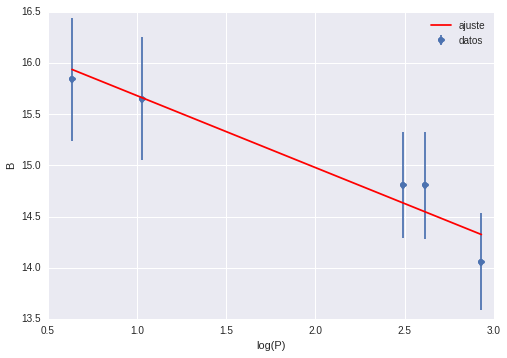

In [27]:
errorbar(log(P), B, yerr= sqrt(diag(V)),fmt='o', label='datos')
plot(log(sorted(P)), tita[0]+tita[1]*log(sorted(P)), 'r-', label='ajuste');
xlabel('log(P)')
ylabel('B')
legend();